## Plate Generation 

-----------------------------------------

#### Step by Step 

##### Task : Randomly generate korean plate and annotaion (mask & code) 

- (1) Using Background image from Coco datasets 
- (2) Using Korean character Font Image / number Image 
- (3) 3 type plate generation ( xx 가 xxxx ) => wide, narrow, green 
- (4) max 5 plate in one background
- (5) label has 4 category type (detected object number , object position, plate category, plate code ) 


In [1]:
import cv2
import skimage
import pandas as pd
import numpy as np
import os
import ast

import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [2]:
def read_img(filename, mode=cv2.IMREAD_COLOR, imshow=True,):
    
    img = cv2.imread(filename, mode)
    b, g, r = cv2.split(img)
    img2 = cv2.merge([r,g,b])
    if imshow:
        plt.imshow(img2)
        plt.xticks([]) # x축 눈금
        plt.yticks([]) # y축 눈금
        plt.show()
    return img2

def save_img(filename, img):
    
    b, g, r = cv2.split(img)
    
    r, g, b = cv2.split(img)
    
    img2 = cv2.merge([b,g,r])
    cv2.imwrite(filename, np.ndarray.astype(img2, int))

In [3]:
## Color Define 
BLACK = (0, 0, 0)
WHITE = (255,255,255)
YELLOW = (225, 180, 80)
ORANGE = (255, 180, 0)
DEEP_BLUE = (33, 44, 66 ) #외교용
LIGHT_BLUE = (185, 218, 238 )# - EV car
GREEN = (70, 130, 80)
BLUE = ( 50, 130, 170 ) # 영업용 택시 old Font

BG_WIDTH = 512
BG_HEIGHT = 512

In [4]:

number_font_img_w = read_img('./test-image/mnist_long_new_font_h150.png', imshow = False)
print (number_font_img_w.shape)

letter_font_img_w = read_img('./test-image/kor_font_1126_height.png', imshow = False)
print (letter_font_img_w.shape)

number_font_img_g = read_img('./test-image/mnist_long_new_font_h150_gree.png', imshow = False)
print (number_font_img_g.shape)

letter_font_img_g = read_img('./test-image/kor_font_1126_green.png', imshow = False)
print (letter_font_img_g.shape)


(150, 1200, 3)
(1400, 1000, 3)
(150, 1200, 3)
(1050, 1000, 3)


In [5]:
def rtn_long_num_img(img, number, length, imshow=False):
    
    h, w, c = img.shape
    char_w = int(w/10)
    
    if type(number) is int : 
        text = str(number)
        while len(text) < length:
            text = '0'+text
        
        rtn_img = np.zeros((h, char_w*length, c))
        idx = 0
        for txt in text:
            num = int(txt)
            rtn_img[:,idx*char_w:(idx+1)*char_w,:] = img[:,num*char_w:(num+1)*char_w,:]/255.0
            idx += 1
        
        if imshow:
            plt.imshow(rtn_img)
            plt.xticks([]) # x축 눈금
            plt.yticks([]) # y축 눈금
            plt.show()
        
        return rtn_img
        
    else:
        print ('Input number type is Error!')
        return -1
    
rtn_num = rtn_long_num_img(number_font_img_w, 43, 4, imshow=False)

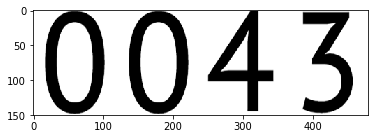

In [6]:
plt.imshow(rtn_num)

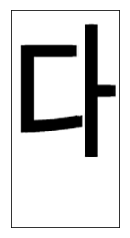

In [7]:
def rtn_letter(img, cls, imshow=False):
    ## Total Class = 62 
    h, w, c = img.shape
    char_w = int(w/10)
    char_h = int(h/7)
    
    num_idx_y = int(cls/10)
    num_idx_x = int(cls%10)
    
    rtn_img = img[num_idx_y*char_h:(num_idx_y+1)*char_h,num_idx_x*char_w:(num_idx_x+1)*char_w, :]/255.0
    
    if imshow:
        plt.imshow(rtn_img)
        plt.xticks([]) # x축 눈금
        plt.yticks([]) # y축 눈금
        plt.show()
            
    return rtn_img

rtn_char = rtn_letter(letter_font_img_w, 2, imshow=True)

(6, 32, 17, 9936)
[(0.02424, 0.08152, 0.11515, 0.81522), (0.1697, 0.08152, 0.11515, 0.81522), (0.30303, 0.16304, 0.12121, 0.70652), (0.44242, 0.08152, 0.11515, 0.81522), (0.58424, 0.08152, 0.11515, 0.81522), (0.7297, 0.08152, 0.11515, 0.81522), (0.87879, 0.08152, 0.11515, 0.81522)]
(184, 825, 3)


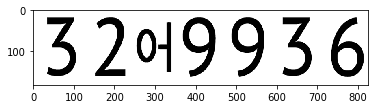

In [8]:
def rtn_random_plate_img(cls):
    
    
    # Class : 0~9(9-unknown)
    # Class 
    # 지역 : 15+1(un-readable)
    # 숫자 : 0~99 + -1(un-readable)
    # 글자 : 86 + -1(un-readable)
    # 숫자 : 0000~9999 + -1(un-readable)
    # total : 2+2+2+4 string
    
    ## loc - text : 0~15 
    loc_txt = np.random.randint(0, 16)
    ## 2-num : 0~99
    num_2 = np.random.randint(0, 100)
    ## 1-letter : 0~85 
    letter_1 = np.random.randint(0, 62)
    ## 4-num : 0~9999
    num_4 = np.random.randint(0, 10000)
    
    num_2_img = rtn_long_num_img(number_font_img_w, num_2, 2, imshow=False)
    h, w, c = num_2_img.shape
    let_1_img = rtn_letter(letter_font_img_w, letter_1, imshow=False)
    num_4_img = rtn_long_num_img(number_font_img_w, num_4, 4, imshow=False)
    
    img_concat = np.concatenate((num_2_img, let_1_img[:h], num_4_img), axis=1)
    
    h, w, c = img_concat.shape
    rtn_img2 = np.zeros( (194,980,3) ) + 1.0
    
    rtn_img2[20:20+h,88:88+w,:] = img_concat

    rtn_code = (cls, num_2, letter_1, num_4)
    
#    h, w, c = rtn_img2.shape
#    if cls == 5:
#        rtn_img2 = cv2.resize(rtn_img2, (int(w*0.6),int(h*0.8)))
#        rtn_img2 = rtn_img2[:, 20:-20,:]
        
    rtn_coord = [(20, 15, 95, 150 ), # in order of x, y, w, h 
                 (140, 15, 95, 150 ), 
                 (250, 30, 100, 130), 
                 (365, 15, 95, 150 ), 
                 (482, 15, 95, 150 ), 
                 (602, 15, 95, 150 ), 
                 (725, 15, 95, 150 )]
    
    h,w,c = rtn_img2[5:-5,80:-75,:].shape
#    print (h, w, c)
    
    new_coord = []
    de_prec = 5
    for item in rtn_coord:
        x0, y0, w0, h0 = item
        new_coord.append( ( round(x0/w, de_prec), round(y0/h, de_prec), round(w0/w, de_prec), round(h0/h, de_prec)   ) )
    
    
    # Caution! - Return img in 0~1 float scale 
    return rtn_img2[5:-5,80:-75,:], rtn_code, new_coord #np.ndarray.astype(img_concat, int), rtn_code, rtn_coord

rtn_img, rtn_code, rtn_coord = rtn_random_plate_img(6)
print (rtn_code)
print (rtn_coord)
print (rtn_img.shape)
plt.imshow(rtn_img)



## Resize & coord invariance Test 

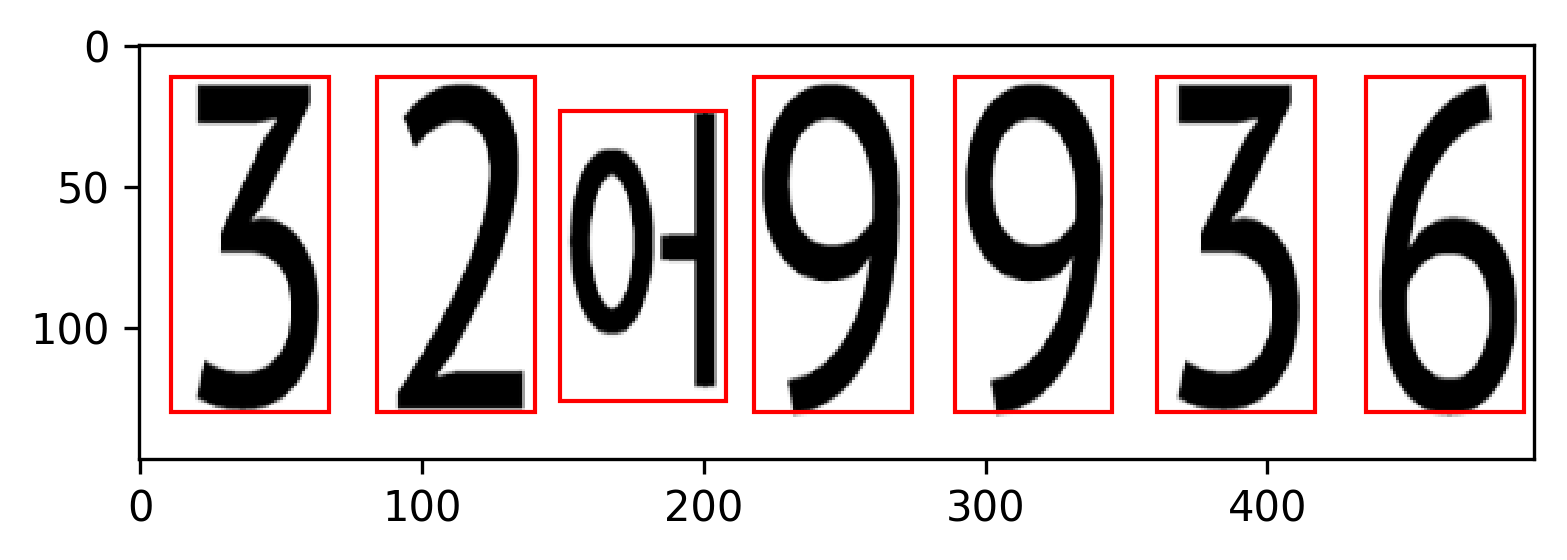

In [9]:
rtn_img_resized = cv2.resize(rtn_img, None, fx=0.6,fy=0.8)


fig2 = plt.figure(figsize=(6, 6), dpi=300)
ax2 = fig2.add_subplot(111, aspect='equal')

ax2.imshow(rtn_img_resized)

h, w, c = rtn_img_resized.shape

for item in rtn_coord:
    x0, y0, w0, h0 = item 
    ax2.add_patch(
             patches.Rectangle(
                (int(x0*w), int(y0*h ) ),
                int(w0*w),
                int(h0*h),
                fill=False,
                edgecolor='r'
             ) )


In [10]:
save_img(os.path.join('./', 'plate-tmp.png'), np.ndarray.astype(rtn_img*255.0, int))

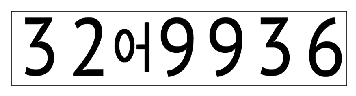

In [11]:
tmp = read_img('./plate-tmp.png', imshow = True)

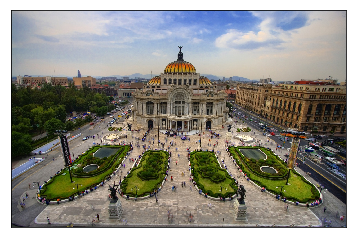

In [12]:
tmp = read_img('./bg-image/00001098.jpg', imshow = True)

[(274, 141, 114, 34), (292, 142, 107, 35)]
[(0, 0, 28, 9100), (0, 68, 55, 1685)]
[[(0.02424, 0.08152, 0.11515, 0.81522), (0.1697, 0.08152, 0.11515, 0.81522), (0.30303, 0.16304, 0.12121, 0.70652), (0.44242, 0.08152, 0.11515, 0.81522), (0.58424, 0.08152, 0.11515, 0.81522), (0.7297, 0.08152, 0.11515, 0.81522), (0.87879, 0.08152, 0.11515, 0.81522)], [(0.02424, 0.08152, 0.11515, 0.81522), (0.1697, 0.08152, 0.11515, 0.81522), (0.30303, 0.16304, 0.12121, 0.70652), (0.44242, 0.08152, 0.11515, 0.81522), (0.58424, 0.08152, 0.11515, 0.81522), (0.7297, 0.08152, 0.11515, 0.81522), (0.87879, 0.08152, 0.11515, 0.81522)]]


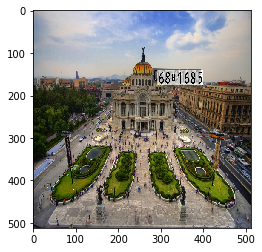

In [16]:

def generate_im():
    
    ## random pick bg 
    fname = './bg-image/00001098.jpg' #"./bg-image/{:08d}.jpg".format(np.random.randint(0, 1100))
    bg_img = read_img(fname, imshow=False)
    bg_img = cv2.resize(bg_img, (BG_WIDTH,BG_HEIGHT))
    
    plate_class = np.random.randint(0, 1) # 0 - no plate in bg 1- black-white 
    plate_num = np.random.randint(1, 3) # 0 - is no plate in img
    
    obj_pos = []
    plate_img = []
    plate_code = []
    plate_coord = []
    
    
    ## load random plate - img 
    ## random plate img resize (30%~80%)
    x_loc_list = np.random.uniform(0.1, 0.62, plate_num)
    y_loc_list = np.random.uniform(0.15, 0.85, plate_num)
    plate_loc_list = []
    for x, y in zip(x_loc_list, y_loc_list):
        plate_loc_list.append((x, y))
        
    rot_M_list = []
    
    mask_img = np.zeros(bg_img.shape)
    for i in range(plate_num):
        tmp_img, tmp_code, tmp_coord = rtn_random_plate_img(plate_class)
        
        #random bg color 
        tmp_img = np.clip(tmp_img - 1.6/np.random.randint(2,10), 0, 1)
        
        #random spot 
        for k in range(120):
            spot_size = np.random.randint(4, 8)
            noise_y = np.random.randint(0, tmp_img.shape[0]-spot_size)
            noise_x = np.random.randint(0, tmp_img.shape[1]-spot_size)
            noise = np.zeros((spot_size,spot_size,3))+.5
            tmp_img[noise_y:noise_y+spot_size,noise_x:noise_x+spot_size,:] = noise 
        
        x_rand_resize = np.random.uniform(0.10, 0.14, 1)[0] #np.random.randint(1, 4)/10.
        y_rand_resize = np.random.uniform(0.10, 0.22, 1)[0] #np.random.randint(1, 4)/10.
        tmp_img_resized = cv2.resize(tmp_img, None, fx=x_rand_resize,fy=y_rand_resize)
        
        p_h, p_w, _ = tmp_img_resized.shape
        b_h, b_w, _ = bg_img.shape
        bg_plate = np.zeros(bg_img.shape)
        bg_mask = np.zeros(bg_img.shape)
        tmp_plate = np.zeros(tmp_img_resized.shape)+1.0
        p_x, p_y = plate_loc_list[i]
        s_x = int(p_x*b_w)
        s_y = int(p_y*b_h)
        ## Making mask for bg
        bg_mask[s_y:s_y+p_h,s_x:s_x+p_w,:] = tmp_plate
        bg_plate[s_y:s_y+p_h,s_x:s_x+p_w,:] = tmp_img_resized
        
        rand_angle = np.random.randint(-6, 7)
        M = cv2.getRotationMatrix2D((bg_plate.shape[1],bg_plate.shape[0]), rand_angle, 1.0)
        rotated_bg_plate = cv2.warpAffine(bg_plate, M, (bg_plate.shape[1],bg_plate.shape[0]))
        rotated_bg_mask = cv2.warpAffine(bg_mask, M, (bg_mask.shape[1],bg_mask.shape[0]))
        
        M = M.tolist()
        
        bg_img_new = bg_img +rotated_bg_mask*255.
        mask_img += rotated_bg_mask
        tmp_mul = 1.0-np.multiply(1.0-rotated_bg_plate, rotated_bg_mask)
        bg_img_new = np.array(np.multiply(bg_img_new, tmp_mul), dtype=int)
        bg_img_new = np.array(bg_img_new, dtype=int)
        bg_img = np.clip(bg_img_new, 0, 255)
        mask_img = np.clip(mask_img, 0, 1)
        
        obj_pos.append( (s_x, s_y, p_w, p_h) )
        plate_img.append(tmp_img_resized)
        plate_code.append(tmp_code)
        plate_coord.append(tmp_coord)
        rot_M_list.append(M)

#    plt.imshow(bg_img)
    return bg_img, mask_img, obj_pos, plate_code, plate_coord, rot_M_list 

bg_img, mask_img, obj_pos, plate_code, plate_coord, rot_M_list = generate_im()
print (obj_pos)
print (plate_code)
print (plate_coord)
plt.imshow(bg_img)


In [17]:
tmp_img, tmp_code, tmp_coord = rtn_random_plate_img(1)
tmp_img.shape, tmp_code, tmp_coord

((184, 825, 3),
 (1, 81, 56, 8946),
 [(0.02424, 0.08152, 0.11515, 0.81522),
  (0.1697, 0.08152, 0.11515, 0.81522),
  (0.30303, 0.16304, 0.12121, 0.70652),
  (0.44242, 0.08152, 0.11515, 0.81522),
  (0.58424, 0.08152, 0.11515, 0.81522),
  (0.7297, 0.08152, 0.11515, 0.81522),
  (0.87879, 0.08152, 0.11515, 0.81522)])

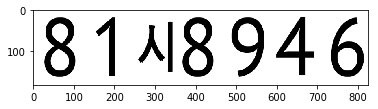

In [18]:
plt.imshow(tmp_img)

In [19]:
save_img('./00000002.png', bg_img)


## Main Function to generate the Training Image 






In [20]:
def save_label_file(file_name, obj, code, coord, m ):
    
    try : 
        with open(file_name, 'w') as f:
            f.write("%s\n" % obj)
            f.write("%s\n" % code)
            f.write("%s\n" % coord)
            f.write("%s\n" % m)
    except:
        print ('File Create Error!')
        return 

In [ ]:

idx = 0

for i in range(50000):
    img_dir = './gen-data/images/'
    mask_dir = './gen-data/mask/'
    label_dir = './gen-data/labels/'
    
    try :
        bg_img, mask_img, obj_pos, plate_code, plate_coord, rot_M_list = generate_im()
    except : 
        continue
    
    img_file_name = "{:08d}.png".format(idx)
    label_file_name = "{:08d}.txt".format(idx)
    
    save_img(os.path.join(img_dir, img_file_name), np.ndarray.astype(bg_img, int))
    save_img(os.path.join(mask_dir, img_file_name), np.ndarray.astype(mask_img*255, int))
    save_label_file(os.path.join(label_dir, label_file_name),obj_pos, plate_code, plate_coord, rot_M_list)
    idx += 1
    
    if idx % 5000 == 0:
        print ('Idx : ',idx, 'created')


Idx :  5000 created
Idx :  10000 created
Idx :  15000 created
Idx :  20000 created


In [ ]:
def open_label_file (file_name):
    try: 
        with open(file_name) as f:
            file_contents = f.readlines()
        file_contents = [line.strip() for line in file_contents]
    except:
        print ('Error - Open File does not exsit :', file_name)
        return 

    obj = ast.literal_eval(file_contents[0])
    code = ast.literal_eval(file_contents[1])
    coord = ast.literal_eval(file_contents[2])
    m = ast.literal_eval(file_contents[3])
    
    return obj, code, coord, m

print (open_label_file(os.path.join(label_dir, '00000004.txt')))

In [ ]:
read_img(os.path.join(img_dir, '00000004.png'), imshow = True)

In [ ]:
read_img(os.path.join(mask_dir, '00000004.png'), imshow = True)